# [TASK 1] FRAUD DETECTION

#### Tasks to perform on the data:
    1) Perform exploratory analysis on the datasets.
    2) Summarise the key trends in the data, providing visualisations as necessary.
    3) Point out the factors that are significant and insignificant in contributing to fraud.
    4) Construct a model to predict if a customer is fraudulent based on their data.
    5) Report on the models success and show what features as well as parameters are most important.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Working with customer data

In [5]:
df1 =  pd.read_csv("customer_data.csv")

In [6]:
df1.head()

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


#### Basic analysis

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [8]:
df1.shape

(168, 10)

In [9]:
df1.describe()

,Unnamed: 0,No_Transactions,No_Orders,No_Payments
count,168.000000,168.000000,168.000000,168.000000
mean,83.500000,3.708333,2.845238,2.035714
std,48.641546,2.801527,1.981919,2.113240
min,0.000000,0.000000,0.000000,0.000000
25%,41.750000,1.000000,1.000000,1.000000
50%,83.500000,4.000000,3.000000,1.000000
75%,125.250000,5.000000,4.000000,2.000000
max,167.000000,15.000000,8.000000,15.000000


#### Working with transaction data

In [10]:
df2 =  pd.read_csv("transaction_data.csv")

In [11]:
df2

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled
...,...,...,...,...,...,...,...,...,...,...,...
618,618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled
619,619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled
620,620,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled
621,621,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled


#### Basic analysis

In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [13]:
df2.describe()

,Unnamed: 0,paymentMethodRegistrationFailure,transactionAmount,transactionFailed
count,623.000000,623.000000,623.000000,623.000000
mean,311.000000,0.131621,34.598716,0.269663
std,179.988889,0.338350,20.360247,0.444141
min,0.000000,0.000000,10.000000,0.000000
25%,155.500000,0.000000,21.000000,0.000000
50%,311.000000,0.000000,34.000000,0.000000
75%,466.500000,0.000000,45.000000,1.000000
max,622.000000,1.000000,353.000000,1.000000


### Exploratory Data Analysis
#### Below are the steps involved to understand, clean and prepare your data for building your predictive model:

    1) Uni-variate Analysis
    2) Bi-variate Analysis
    3) Multi-variate Analysis

#### LETS ANALYZE OUR TARGET VARIABLE (UNIVARIAT ANALYSIS)

In [14]:
df1['Fraud']=np.where(df1['Fraud']==False,0,1)

In [15]:
df1.shape

(168, 10)

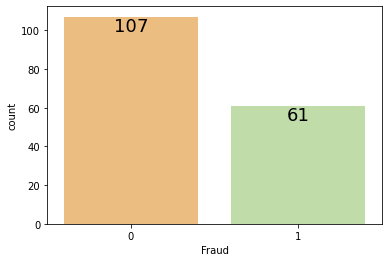

In [16]:
ax=sns.countplot(df1['Fraud'],data = df1, palette='Spectral')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()

 61 transactions are labelled as fraud and 107 as not fraud. the target is imbalance but let see the data after we combine it with transaction data

### Bi-Variate Analysis
<b>Lets compare our continous variables with our target categorical variable Fraud in df1</b>

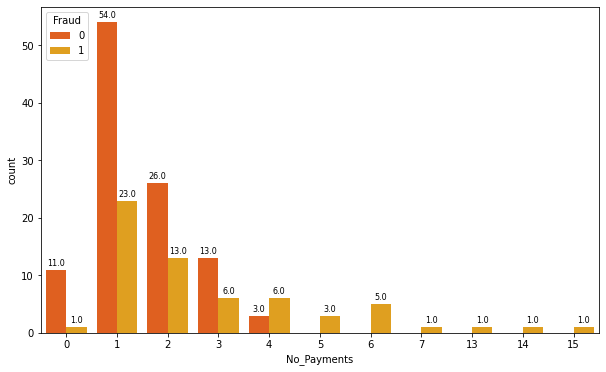

In [17]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df1['No_Payments'],hue =df1['Fraud'],palette='autumn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+2), ha='center', va='top', color='black', size=8)
plt.show()

From this data, we can see that if number of payments are greater than 4 then customer is surely a fraud

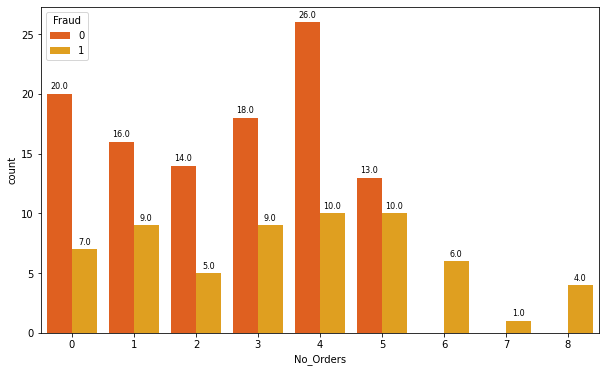

In [18]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df1['No_Orders'],hue =df1['Fraud'],palette='autumn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+1), ha='center', va='top', color='black', size=8)
plt.show()

From this data if number of orders are greater than 5 then the customer is surely a fraud

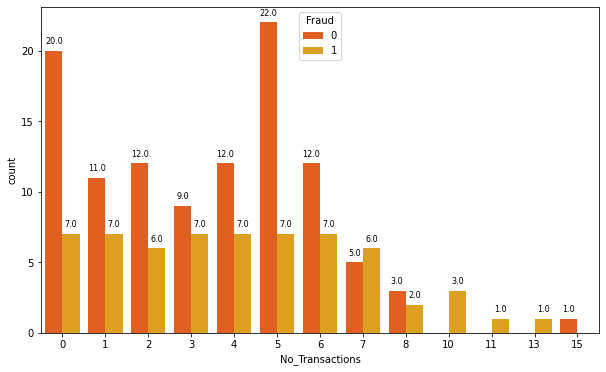

In [19]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df1['No_Transactions'],hue =df1['Fraud'],palette='autumn')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+1), ha='center', va='top', color='black', size=8)
plt.show()

Customer with number of transactions above 8 seems to be doing fraud. Maybe the company should limit the transaction up to 8 transactions maximum.

<b>Lets compare our continous variables with our target categorical variable Fraud in df2</b>

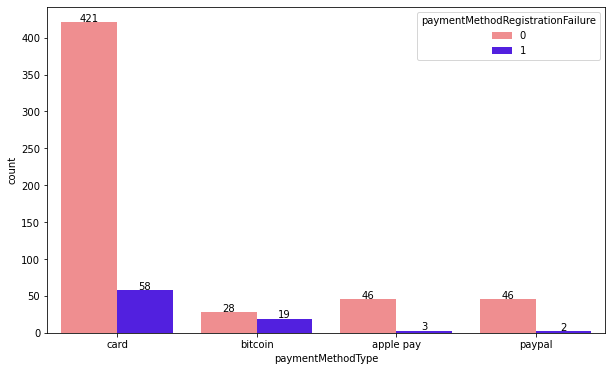

In [20]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df2['paymentMethodType'], hue=df2['paymentMethodRegistrationFailure'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

Even the most registration failure coming from card transaction, the bit coin registration failure contribute the biggest failure in term of percentage. It is 68% registration failure on bitcoin transaction compare to only 14% regristration failure on card transanction. 

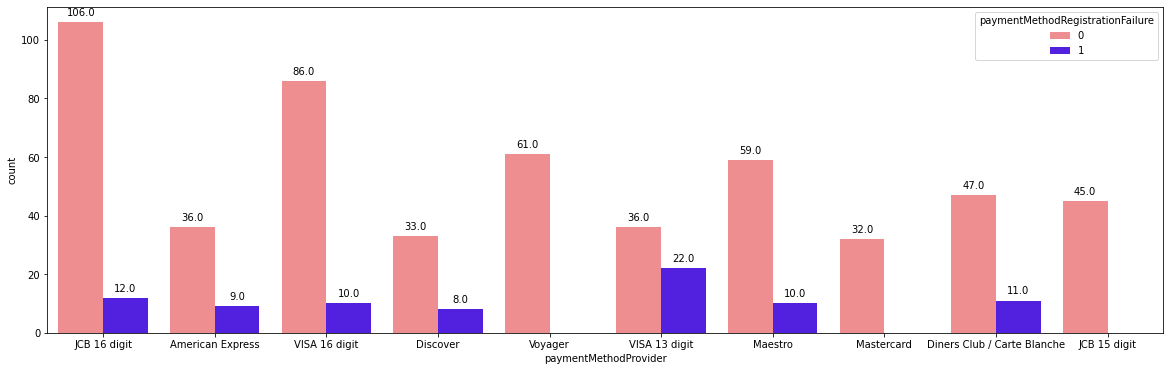

In [21]:
plt.figure(figsize=(20,6))
ax=sns.countplot(df2['paymentMethodProvider'], hue=df2['paymentMethodRegistrationFailure'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+5), ha='center', va='top', color='black', size=10)
plt.show()

Visa 13 payment provider had most registration failures. Since the total registration failure from the card (most of these payment provider is a card) is not too significant, we can ignore this part. 

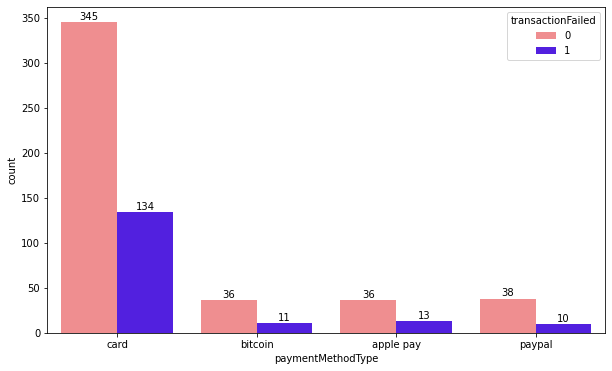

In [22]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df2['paymentMethodType'], hue=df2['transactionFailed'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

Most transactions failed coming from card payments (around 39%) compre to the others (bitcoin 30%, apple pay 36%, and paypal 26%).

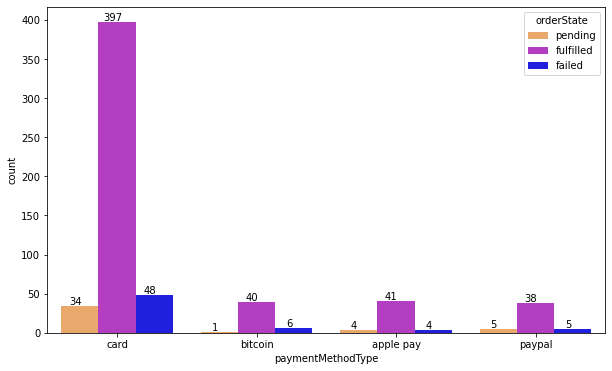

In [23]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df2['paymentMethodType'], hue=df2['orderState'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.1, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

Large number of orders failed when using card

<b>Let's focus on combining the values of two datsets</b>
<ul>
    <li>As we know the first table consists of customer details and second table consists of transactions details of these customers.</li>
    <li>We have to merge these tables on the basis of common emails that are found in both the tables</li>
    <li>We will use inner join that combines two dataframes and returns ony those rows with matching values in both dataframes</li></ul>

In [24]:
df = pd.merge(df2,df1, on="customerEmail",how="inner")

In [25]:
df.head()

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1


In [26]:
df.drop(['Unnamed: 0_x','Unnamed: 0_y'],axis = 1, inplace = True)

In [27]:
df.shape

(819, 18)

<b> Checking missing value </b>

In [28]:
df.isnull().sum()

customerEmail                       0
transactionId                       0
orderId                             0
paymentMethodId                     0
paymentMethodRegistrationFailure    0
paymentMethodType                   0
paymentMethodProvider               0
transactionAmount                   0
transactionFailed                   0
orderState                          0
customerPhone                       0
customerDevice                      0
customerIPAddress                   0
customerBillingAddress              0
No_Transactions                     0
No_Orders                           0
No_Payments                         0
Fraud                               0
dtype: int64

In [29]:
df[df.duplicated()].sum()

customerEmail                       0.0
transactionId                       0.0
orderId                             0.0
paymentMethodId                     0.0
paymentMethodRegistrationFailure    0.0
paymentMethodType                   0.0
paymentMethodProvider               0.0
transactionAmount                   0.0
transactionFailed                   0.0
orderState                          0.0
customerPhone                       0.0
customerDevice                      0.0
customerIPAddress                   0.0
customerBillingAddress              0.0
No_Transactions                     0.0
No_Orders                           0.0
No_Payments                         0.0
Fraud                               0.0
dtype: float64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   customerEmail                     819 non-null    object
 1   transactionId                     819 non-null    object
 2   orderId                           819 non-null    object
 3   paymentMethodId                   819 non-null    object
 4   paymentMethodRegistrationFailure  819 non-null    int64 
 5   paymentMethodType                 819 non-null    object
 6   paymentMethodProvider             819 non-null    object
 7   transactionAmount                 819 non-null    int64 
 8   transactionFailed                 819 non-null    int64 
 9   orderState                        819 non-null    object
 10  customerPhone                     819 non-null    object
 11  customerDevice                    819 non-null    object
 12  customerIPAddress     

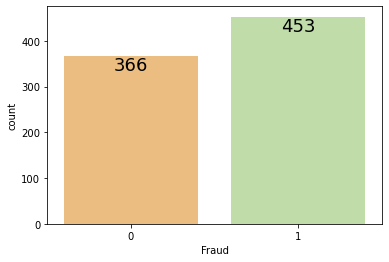

In [31]:
ax=sns.countplot(df['Fraud'],data = df, palette='Spectral')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=18)
plt.show()

After we combine between two datas, the fraud percentage is increasing. it shows us that the second data (transaction data) has affect more fraud results. For more analysis lest do the multivariat analysis

### MULTIVARIAT ANALYSIS

In [32]:
df.head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,0
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1


In [33]:
df.loc[df['Fraud']==1].head()

,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,1
13,uchen@malone.com,q8j3dgni,56h7iw,olr4zf09x,0,card,VISA 13 digit,71,0,fulfilled,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1
14,uchen@malone.com,xjulqy8x,kowj1v,gehl28i8u,0,card,JCB 16 digit,66,1,fulfilled,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,1


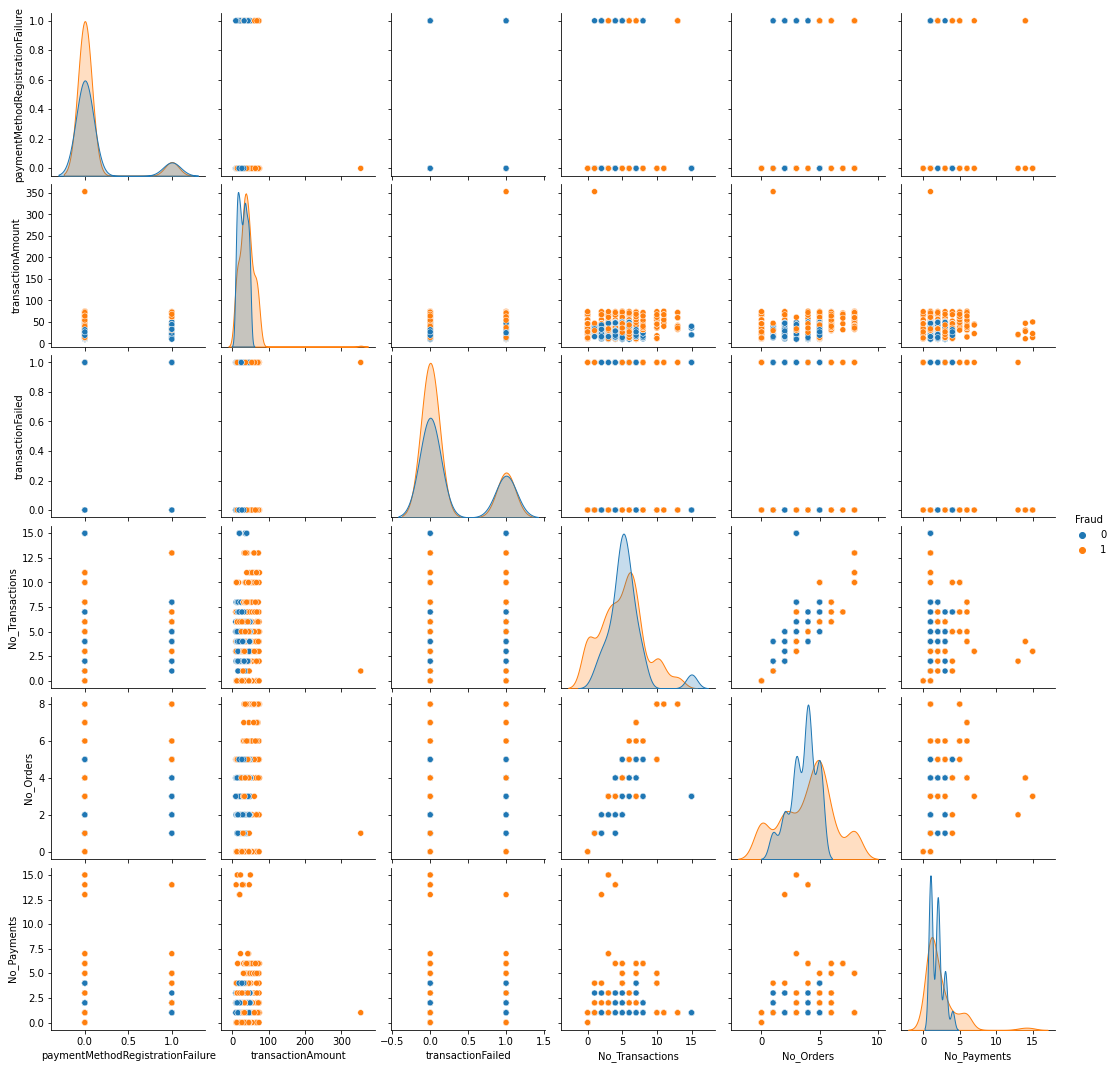

In [34]:
sns.pairplot(df, hue="Fraud")

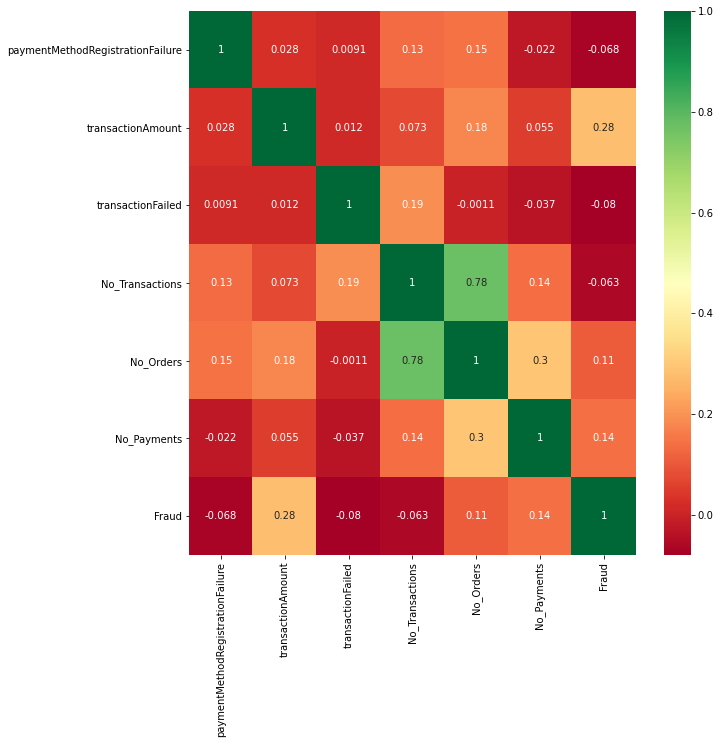

In [36]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#heatmap
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From above pairplot and heatmap we can see that transaction amount is the features that affect the increase in fraud transaction percentage. The bigger transaction amount the higher fraud transaction happend. For the detail we can see on below chart that for transaction above 50 the transaction all fraudulent.

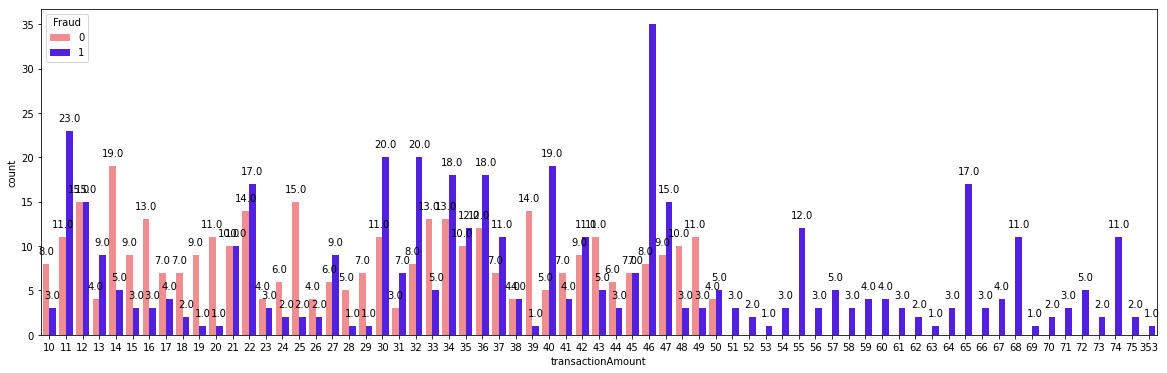

In [37]:
plt.figure(figsize=(20,6))
ax=sns.countplot(df['transactionAmount'], hue=df['Fraud'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+2), ha='center', va='top', color='black', size=10)
plt.show()

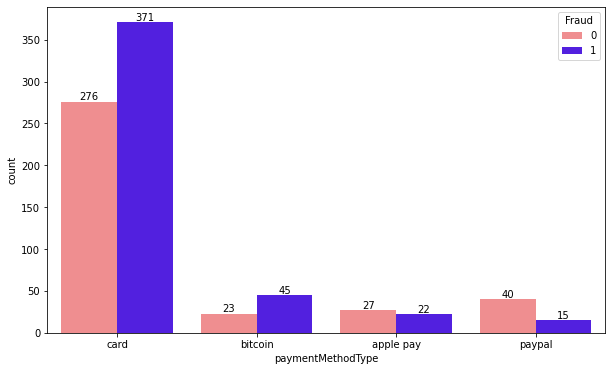

In [38]:
plt.figure(figsize=(10,6))
ax=sns.countplot(df['paymentMethodType'], hue=df['Fraud'],palette='gnuplot2_r')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.2, p.get_height()+12), ha='center', va='top', color='black', size=10)
plt.show()

From this comparison also we can see that bitcoin and card card payment has significant fraudulent transaction that two others.

# Modelling

In [39]:
#first we drop the unnecessary categorical features 
df3 = df.drop(['customerEmail','transactionId','orderId','paymentMethodId','customerPhone',
               'customerPhone','customerDevice','customerIPAddress','customerBillingAddress'], axis='columns')

In [40]:
df3 = pd.get_dummies(df3,drop_first=True)

In [41]:
df3.head()

,paymentMethodRegistrationFailure,transactionAmount,transactionFailed,No_Transactions,No_Orders,No_Payments,Fraud,paymentMethodType_bitcoin,paymentMethodType_card,paymentMethodType_paypal,...,paymentMethodProvider_Discover,paymentMethodProvider_JCB 15 digit,paymentMethodProvider_JCB 16 digit,paymentMethodProvider_Maestro,paymentMethodProvider_Mastercard,paymentMethodProvider_VISA 13 digit,paymentMethodProvider_VISA 16 digit,paymentMethodProvider_Voyager,orderState_fulfilled,orderState_pending
0,1,18,0,2,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,26,0,2,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,45,0,3,3,7,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,23,0,3,3,7,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,43,1,3,3,7,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
X = df3.drop("Fraud", axis=1)
y = df3.Fraud

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### RANDOM FOREST CLASSIFIER

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [46]:
rfc = RandomForestClassifier(n_estimators=150)
rfc.fit(X_train,y_train)
pred = rfc.predict(X_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[ 99  12]
 [ 18 117]]
0.8780487804878049
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       111
           1       0.91      0.87      0.89       135

    accuracy                           0.88       246
   macro avg       0.88      0.88      0.88       246
weighted avg       0.88      0.88      0.88       246



In [47]:
print(rfc.feature_importances_)

[0.01978058 0.25744482 0.01900574 0.17822268 0.17094212 0.11724179
 0.01074361 0.020577   0.02065007 0.01323303 0.01764712 0.01603071
 0.01827334 0.02036534 0.01097803 0.01165409 0.02296082 0.02057596
 0.02231906 0.01135409]


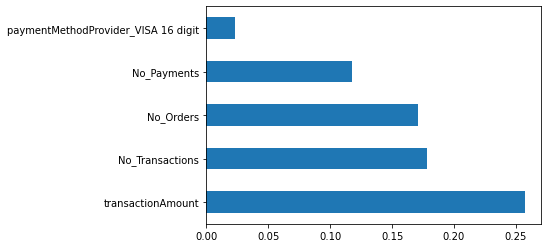

In [48]:
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

#### LOGISTIC REGRESSION

In [49]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression()
logr.fit(X_train,y_train)
log_pred =logr.predict(X_test)
print(confusion_matrix(y_test,log_pred))
print(accuracy_score(y_test,log_pred))
print(classification_report(y_test,log_pred))

[[ 57  54]
 [ 29 106]]
0.6626016260162602
              precision    recall  f1-score   support

           0       0.66      0.51      0.58       111
           1       0.66      0.79      0.72       135

    accuracy                           0.66       246
   macro avg       0.66      0.65      0.65       246
weighted avg       0.66      0.66      0.66       246



<b> Model selection reason </b>

For Modeling we choose the Random Forest Classifier for this case because the behaviour of the data (especially transaction amount that has higher correlation) that shown in heatmap is <b> not linearly separable </b> (SVM, Regression) and it will be more effective if we use ensamble method like bagging or boosting. The RFC also very powerfull to cater the imbalance dataset so we choose it to cater the imbalance fraud cases eventhough the imbalance is not too significant.

As we can see Random Forest Classifier algorithm has better accuracy to predict the fraudulent transaction for this dataset compared to logistic regression. it shown also on the confussion matrix that RFC has better score of prediction.

<b> Hyper parameter Tuning </b>

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
rfc_param_grid = { 
    'n_estimators': [100,150,200,350,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

In [53]:
grid_rfc = GridSearchCV(RandomForestClassifier(),rfc_param_grid,refit=True,verbose=3)

In [54]:
grid_rfc.fit(X_train,y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=150; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=150; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=150; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=150; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=4, max_features=

[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=150; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=200; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=350; total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=350; total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=5, max_features=auto, n_estimators=350; total time=   0.5s
[CV 4/5] END criteri

[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=350; total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=350; total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=350; total time=   1.2s
[CV 1/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=   0.9s
[CV 2/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=   0.8s
[CV 3/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=   0.8s
[CV 4/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=   0.8s
[CV 5/5] END criterion=gini, max_depth=6, max_features=auto, n_estimators=500; total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=6, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 3/5] END criteri

[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=150; total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=7, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 2/5] END criteri

[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=200; total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 2/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 3/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 4/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 5/5] END criterion=gini, max_depth=8, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 1/5] END criteri

[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=350; total time=   0.5s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.8s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.8s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=4, max_features=sqrt, n_estimators=500; total time=   1.0s
[CV 1/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   0.1s
[CV 2/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=4, max_features=log2, n_estimators=100; total tim

[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=100; total time=   0.1s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=150; total time=   0.2s
[CV 2/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=150; total time=   0.2s
[CV 3/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=150; total time=   0.2s
[CV 4/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=150; total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=150; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=5, max_features=log2, n_estimators=200; total tim

[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=150; total time=   0.2s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=150; total time=   0.2s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   0.3s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   0.3s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   0.3s
[CV 4/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   0.3s
[CV 5/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=200; total time=   0.3s
[CV 1/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=350; total time=   0.5s
[CV 2/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=350; total time=   0.5s
[CV 3/5] END criterion=entropy, max_depth=6, max_features=log2, n_estimators=350; total tim

[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=350; total time=   0.6s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=350; total time=   0.6s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=350; total time=   0.6s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=350; total time=   0.6s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=350; total time=   0.6s
[CV 1/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.9s
[CV 2/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.9s
[CV 3/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   0.9s
[CV 4/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total time=   1.2s
[CV 5/5] END criterion=entropy, max_depth=7, max_features=log2, n_estimators=500; total tim

[CV 3/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500; total time=   0.8s
[CV 4/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500; total time=   0.8s
[CV 5/5] END criterion=entropy, max_depth=8, max_features=log2, n_estimators=500; total time=   0.8s


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 150, 200, 350, 500]},
             verbose=3)

In [55]:
grid_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'n_estimators': 200}

In [56]:
grid_rfc.best_estimator_

RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=200)

In [57]:
grid_rfc_predictions = grid_rfc.predict(X_test)

In [58]:
print(accuracy_score(y_test,grid_rfc_predictions))
print(confusion_matrix(y_test,grid_rfc_predictions))
print(classification_report(y_test,grid_rfc_predictions))

0.8577235772357723
[[ 99  12]
 [ 23 112]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       111
           1       0.90      0.83      0.86       135

    accuracy                           0.86       246
   macro avg       0.86      0.86      0.86       246
weighted avg       0.86      0.86      0.86       246



# CONCLUSION

#### From the EDA and modeling process some point need to be highlighted:
    1) From this data we can see that higher number of transactions, number of orders, and number of payment lead to higher     
       probability of fraud transaction. To prefent the fraudulence the company should set maximum transaction
    2) The bitcoin payment method has 68% registration failure and also 66% fraud transaction. Company should re-consider to  
       allow this payment method on the future.
    3) We choose the Random Forest Classifier (RFC) for this case because the behaviour of the data (especially transaction   
       amount that has higher correlation) that shown in heatmap is not linearly separable.
       We also do the hyper parameter tuning using grid search sv to get the best parameter to be fit with the RFC model.
    4) Based on confusion matrix we got 85% accuracy, which means we got 85% total correct predictions compare to total 
       numbers of observation.
    5) Precission for 1 class (fraud) we got 90% means we got 90% total correct fraud predictions compare to total numer  
       observation for fraud class. Same explanation for 0 class (non fraud).
    6) Recall for 1 class (fraud) we got 82% means we got 82% total correct fraud predictions compare to total observation       
       for actual fraud numbers. Same explanation for 0 class (non fraud).